# Estudo prático da estrutura das redes neurais convolucionais

#### Sabrina Otoni da Silva - 2023

In [15]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

11490434/11490434 [==============================] - 1s 0us/step


Text(0.5, 1.0, 'Classe 5')

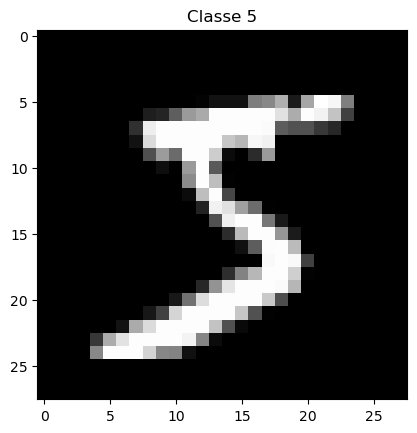

In [8]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
plt.imshow(X_treinamento[0], cmap = 'gray')
plt.title('Classe ' + str(y_treinamento[0]))

In [9]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0],
                                               28, 28, 1)
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

previsores_treinamento /= 255
previsores_teste /= 255

classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

In [10]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), 
                         input_shape=(28, 28, 1),
                         activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))
#classificador.add(Flatten())

classificador.add(Conv2D(32, (3,3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10, 
                        activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 128, epochs = 2,
                  validation_data = (previsores_teste, classe_teste))

resultado = classificador.evaluate(previsores_teste, classe_teste)
resultado

Epoch 1/2
469/469 [==============================] - 20s 41ms/step - loss: 0.2022 - accuracy: 0.9375 - val_loss: 0.2686 - val_accuracy: 0.9148
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 0.0357 - accuracy: 0.9884


[0.035697028040885925, 0.9883999824523926]

Previsão de somente uma imagem.

1/1 [==============================] - 0s 152ms/step


7

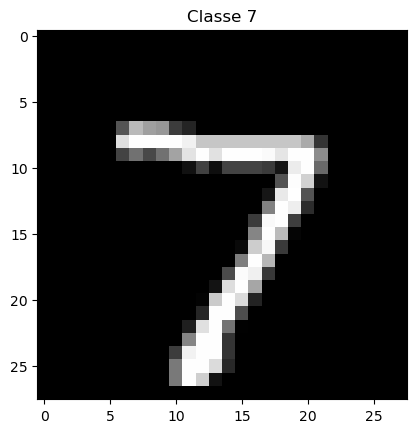

In [11]:
plt.imshow(X_teste[0], cmap = 'gray')
plt.title('Classe ' + str(y_teste[0]))

imagem_teste = X_teste[0].reshape(1, 28, 28, 1)
imagem_teste = imagem_teste.astype('float32')
imagem_teste /= 255

previsoes = classificador.predict(imagem_teste)
resultado = np.argmax(previsoes)
resultado

Utilizando validação cruzada.

In [12]:
seed = 5
np.random.seed(seed)

(X, y), (X_teste, y_teste) = mnist.load_data()
previsores = X.reshape(X.shape[0], 28, 28, 1)
previsores = previsores.astype('float32')
previsores /= 255
classe = np_utils.to_categorical(y, 10)

In [13]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
resultados = []

a = np.zeros(5)
b = np.zeros(shape = (classe.shape[0], 1))

for indice_treinamento, indice_teste in kfold.split(previsores, 
                                                    np.zeros(shape = (classe.shape[0], 1))):
    #print('Índices treinamento: ', indice_treinamento, 'Índice teste', indice_teste)
    classificador = Sequential()
    classificador.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation = 'relu'))
    classificador.add(MaxPooling2D(pool_size = (2,2)))
    classificador.add(Flatten())
    classificador.add(Dense(units = 128, activation = 'relu'))
    classificador.add(Dense(units = 10, activation = 'softmax'))
    classificador.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                          metrics = ['accuracy'])
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento],
                      batch_size = 128, epochs = 5)
    precisao = classificador.evaluate(previsores[indice_teste], classe[indice_teste])
    resultados.append(precisao[1])

#media = resultados.mean()
media = sum(resultados) / len(resultados)
media

Epoch 1/5
375/375 [==============================] - 9s 22ms/step - loss: 0.2526 - accuracy: 0.9282
Epoch 2/5
375/375 [==============================] - 8s 22ms/step - loss: 0.0775 - accuracy: 0.9770
Epoch 3/5
375/375 [==============================] - 8s 21ms/step - loss: 0.0516 - accuracy: 0.9851
Epoch 4/5
375/375 [==============================] - 8s 22ms/step - loss: 0.0364 - accuracy: 0.9893
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0582 - accuracy: 0.9824
Epoch 1/5
375/375 [==============================] - 9s 22ms/step - loss: 0.2513 - accuracy: 0.9285
Epoch 2/5
375/375 [==============================] - 9s 23ms/step - loss: 0.0786 - accuracy: 0.9775
Epoch 3/5
375/375 [==============================] - 8s 23ms/step - loss: 0.0515 - accuracy: 0.9850
Epoch 4/5
375/375 [==============================] - 9s 25ms/step - loss: 0.0388 - accuracy: 0.9882
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0542 - accuracy: 0.9828
Ep

0.9837666630744935

Utilizando augumentation.

In [14]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0],
                                               28, 28, 1)
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')
previsores_treinamento /= 255
previsores_teste /= 255
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation = 'relu'))
classificador.add(MaxPooling2D(pool_size = (2,2)))
classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dense(units = 10, activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])

gerador_treinamento = ImageDataGenerator(rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)
gerador_teste = ImageDataGenerator()

base_treinamento = gerador_treinamento.flow(previsores_treinamento,
                                            classe_treinamento, batch_size = 128)
base_teste = gerador_teste.flow(previsores_teste, classe_teste, batch_size = 128)

classificador.fit_generator(base_treinamento, steps_per_epoch = 600000 / 128,
                            epochs = 5, validation_data = base_teste,
                            validation_steps = 10000 / 128)

Epoch 1/5


C:\Users\012728631\AppData\Local\Temp\ipykernel_14440\2802398662.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classificador.fit_generator(base_treinamento, steps_per_epoch = 600000 / 128,


4687/4687 [==============================] - 19s 4ms/step - loss: 0.5086 - accuracy: 0.8400 - val_loss: 0.1828 - val_accuracy: 0.9436


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Class 3')

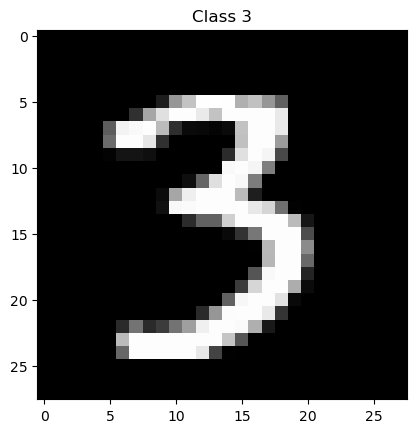

In [16]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
print(X_treinamento.shape)
print(y_treinamento.shape)
print(X_teste.shape)
print(y_teste.shape)

plt.imshow(X_treinamento[10000], cmap='gray')
plt.title('Class '+ str(y_treinamento[10000]))

In [17]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)
previsores_treinamento
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

previsores_treinamento /= 255
previsores_teste /= 255

classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

In [18]:
classificador = Sequential()
classificador.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))
classificador.add(Conv2D(32, (3, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))
classificador.add(Flatten())
classificador.add(BatchNormalization())

classificador.add(Dense(128, activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(Dropout(0.3))
classificador.add(Dense(10,activation="softmax"))
classificador.compile(loss='categorical_crossentropy', 
                      optimizer="adam", metrics=['accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento, 
                  batch_size=128, epochs=20, 
                  validation_data=(previsores_teste, classe_teste), verbose=2)

resultado = classificador.evaluate(previsores_teste, classe_teste)
resultado

Epoch 1/20
469/469 - 20s - loss: 0.1541 - accuracy: 0.9534 - val_loss: 0.7864 - val_accuracy: 0.7024 - 20s/epoch - 43ms/step
Epoch 2/20
469/469 - 18s - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0345 - val_accuracy: 0.9885 - 18s/epoch - 39ms/step
Epoch 3/20
469/469 - 20s - loss: 0.0348 - accuracy: 0.9899 - val_loss: 0.0411 - val_accuracy: 0.9860 - 20s/epoch - 42ms/step
Epoch 4/20
469/469 - 18s - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0320 - val_accuracy: 0.9896 - 18s/epoch - 39ms/step
Epoch 5/20
469/469 - 18s - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0339 - val_accuracy: 0.9898 - 18s/epoch - 39ms/step
Epoch 6/20
469/469 - 19s - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0285 - val_accuracy: 0.9913 - 19s/epoch - 41ms/step
Epoch 7/20
469/469 - 19s - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0275 - val_accuracy: 0.9914 - 19s/epoch - 41ms/step
Epoch 8/20
469/469 - 22s - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0346 - val_accuracy: 0.9886 - 22s/epoch - 46ms/step


[0.03280232101678848, 0.9908999800682068]